In [1]:
import os
import sys

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
data_dir = os.path.join(project_dir, 'data')
log_dir = os.path.join(project_dir, 'log')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)
import matplotlib.pyplot as plt
import numpy as np

from functools import partial
import mech.full_DPSGD as DPSGDModule
from analysis.tradeoff_Gaussian import Gaussian_curve
from analysis.accuracy_analysis import create_plot

In [3]:
model_name = 'convnet_balanced'
database_size = 1000
epochs = 20
internal_result_path = "/scratch/bell/wei402/fdp-estimation/results"


data_args = {
    "method": "default",
    "data_dir": data_dir,
    "internal_result_path": internal_result_path
}

claimed_f = partial(Gaussian_curve, mean_difference = 0.1)

args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_KLDivLoss", claimed_f=claimed_f)

auditor = DPSGDModule.DPSGD_Auditor(args)

Files already downloaded and verified


05/19/2025 18:26:48:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/19/2025 18:26:48:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/19/2025 18:26:48:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu


In [4]:
output = auditor.build()

05/19/2025 18:26:53:INFO:Found 1000 samples in /scratch/bell/wei402/fdp-estimation/results/train/convnet_balanced_1000_20/samples_folder. Skipping generation.
05/19/2025 18:27:16:INFO:Found 1000 samples in /scratch/bell/wei402/fdp-estimation/results/test/convnet_balanced_1000_20/samples_folder. Skipping generation.
05/19/2025 18:27:16:INFO:Found 1000 samples in /scratch/bell/wei402/fdp-estimation/results/train/convnet_balanced_1000_20/samples_folder. Skipping generation.


In [5]:
output["Report"] 

'Violation'

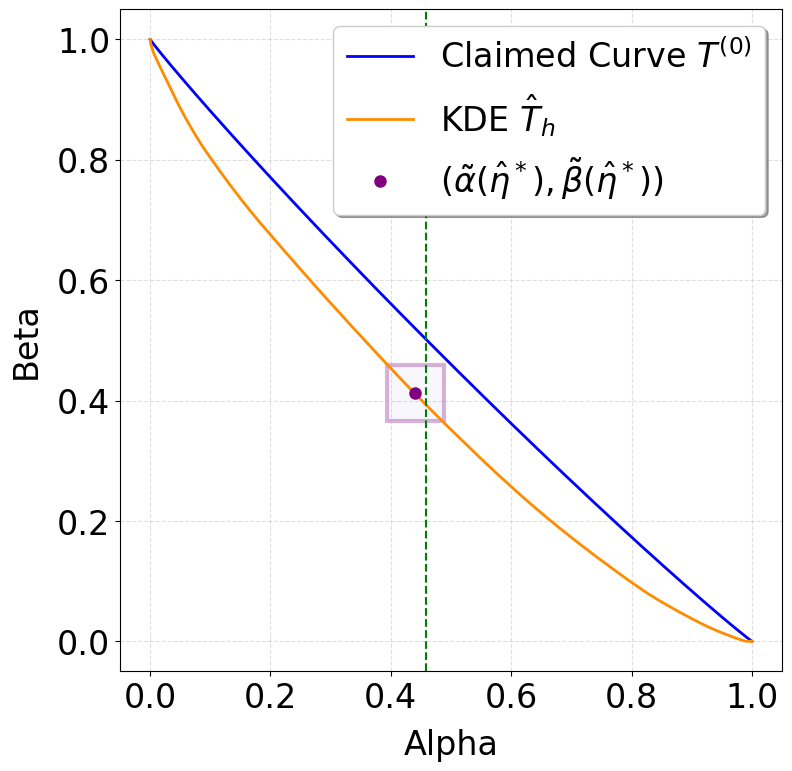

In [6]:
file_name = os.path.join(fig_dir, f"auditing_{model_name}_{database_size}.png")
# Plot the results
create_plot(output["omega"], output["estimated_alpha"], output["estimated_beta"], np.linspace(0,1,500), output["scan_alpha"], output["scan_beta"], output["critical_alpha"], output["critical_beta"], file_name, claimed_curve=claimed_f)